<a href="https://colab.research.google.com/github/revanthjavvaji/Rice_Identification/blob/main/Rice_Identication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/content/Rice_MSC_Dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Columns: 107 entries, AREA to CLASS
dtypes: float64(95), int64(11), object(1)
memory usage: 61.2+ MB


In [ ]:
df.head(5)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,...,113.9924,65.0610,59.5989,104.8552,67.8779,63.0828,0.3673,0.3793,0.4733,Basmati
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,...,105.7055,64.3685,62.2084,96.8375,65.5371,63.5832,0.3014,0.3144,0.3641,Arborio
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,...,109.7155,62.6423,58.7439,100.2352,68.9753,59.8342,0.3233,0.3445,0.4448,Jasmine
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,...,116.5405,64.9069,60.2562,107.2560,67.3298,63.2237,0.3880,0.4020,0.4904,Basmati
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,...,107.7502,64.7071,61.3549,98.8704,66.2048,63.5378,0.3184,0.3303,0.3928,Arborio


In [ ]:
dictForClasses = {k: v for k, v in zip(list(set(df.iloc[:, -1].tolist())),list(range(len(list(set(df.iloc[:, -1].tolist()))))))}
dictForClasses

{'Arborio': 4, 'Basmati': 1, 'Ipsala': 3, 'Jasmine': 2, 'Karacadag': 0}

In [ ]:
for i in range(75000):
    classes = dictForClasses[df.iloc[i, -1]]
    df.loc[i, 'CLASS'] = classes

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Columns: 107 entries, AREA to CLASS
dtypes: float64(95), int64(11), object(1)
memory usage: 61.2+ MB


In [ ]:
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,...,113.9924,65.0610,59.5989,104.8552,67.8779,63.0828,0.3673,0.3793,0.4733,1
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,...,105.7055,64.3685,62.2084,96.8375,65.5371,63.5832,0.3014,0.3144,0.3641,4
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,...,109.7155,62.6423,58.7439,100.2352,68.9753,59.8342,0.3233,0.3445,0.4448,2
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,...,116.5405,64.9069,60.2562,107.2560,67.3298,63.2237,0.3880,0.4020,0.4904,1
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,...,107.7502,64.7071,61.3549,98.8704,66.2048,63.5378,0.3184,0.3303,0.3928,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,5551,285.911,114.1695,62.9079,0.8345,84.0699,0.9846,5638,0.6418,1.8149,...,103.9529,64.9225,62.4355,95.2780,65.5114,64.4457,0.2895,0.2997,0.3455,4
74996,7696,322.703,121.3900,81.1375,0.7438,98.9892,0.9868,7799,0.7309,1.4961,...,108.9778,65.4571,59.9502,100.2301,67.5089,63.6028,0.3335,0.3426,0.4257,0
74997,7579,339.295,136.3125,71.2866,0.8524,98.2338,0.9805,7730,0.6399,1.9122,...,106.0881,64.1869,61.3876,97.1585,66.2445,63.0596,0.3028,0.3164,0.3761,4
74998,15174,489.502,200.9486,97.6282,0.8740,138.9969,0.9766,15537,0.7903,2.0583,...,119.2037,63.3545,64.8200,109.3027,63.3122,63.5967,0.3970,0.4215,0.4469,3


In [ ]:
fg = np.array(df, dtype=float)
np.any(np.isnan(fg))

True

In [ ]:
df2=df.dropna()

In [ ]:
df2

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,...,113.9924,65.0610,59.5989,104.8552,67.8779,63.0828,0.3673,0.3793,0.4733,1
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,...,105.7055,64.3685,62.2084,96.8375,65.5371,63.5832,0.3014,0.3144,0.3641,4
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,...,109.7155,62.6423,58.7439,100.2352,68.9753,59.8342,0.3233,0.3445,0.4448,2
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,...,116.5405,64.9069,60.2562,107.2560,67.3298,63.2237,0.3880,0.4020,0.4904,1
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,...,107.7502,64.7071,61.3549,98.8704,66.2048,63.5378,0.3184,0.3303,0.3928,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,5551,285.911,114.1695,62.9079,0.8345,84.0699,0.9846,5638,0.6418,1.8149,...,103.9529,64.9225,62.4355,95.2780,65.5114,64.4457,0.2895,0.2997,0.3455,4
74996,7696,322.703,121.3900,81.1375,0.7438,98.9892,0.9868,7799,0.7309,1.4961,...,108.9778,65.4571,59.9502,100.2301,67.5089,63.6028,0.3335,0.3426,0.4257,0
74997,7579,339.295,136.3125,71.2866,0.8524,98.2338,0.9805,7730,0.6399,1.9122,...,106.0881,64.1869,61.3876,97.1585,66.2445,63.0596,0.3028,0.3164,0.3761,4
74998,15174,489.502,200.9486,97.6282,0.8740,138.9969,0.9766,15537,0.7903,2.0583,...,119.2037,63.3545,64.8200,109.3027,63.3122,63.5967,0.3970,0.4215,0.4469,3


In [ ]:
X = np.array(df2.iloc[:, 0:106])
y = np.asarray(df2.iloc[:, -1]).astype('int64')

In [ ]:
X.shape

(74992, 106)

In [ ]:
y.shape

(74992,)

In [ ]:
#---------------------------Decision Trees Classifier-------------------#

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [ ]:
# Creating the classifier object
clf_gini = DecisionTreeClassifier(criterion = "gini",
random_state = 100,max_depth=3, min_samples_leaf=5)
  
# Performing training
clf_gini.fit(X_train, y_train)
clf_gini

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [ ]:
 # Decision tree with entropy
clf_entropy = DecisionTreeClassifier(
criterion = "entropy", random_state = 100,
max_depth = 3, min_samples_leaf = 5)
 # Performing training
clf_entropy.fit(X_train, y_train)
clf_entropy

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [ ]:
 # Predicton on test with giniIndex
y_pred = clf_gini.predict(X_test)
print("Predicted values:")
print(y_pred)
y_pred

Predicted values:
[4 1 0 ... 0 1 3]


array([4, 1, 0, ..., 0, 1, 3])

In [ ]:
print("Accuracy : ",accuracy_score(y_test,y_pred)*100)
      
    

Accuracy :  97.05568593983358


In [ ]:
#----------------------Light gbm-----------------------#

In [ ]:
!pip install flaml
from sklearn.model_selection import train_test_split
from flaml import AutoML
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

model = AutoML()
model.fit(X_train, y_train, metric='accuracy', task='classification', time_budget=10)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[flaml.automl: 05-30 14:49:37] {2365} INFO - task = classification
[flaml.automl: 05-30 14:49:37] {2367} INFO - Data split method: stratified
[flaml.automl: 05-30 14:49:37] {2371} INFO - Evaluation method: holdout
[flaml.automl: 05-30 14:49:37] {2448} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 05-30 14:49:37] {2561} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 05-30 14:49:37] {2853} INFO - iteration 0, current learner lgbm
[flaml.automl: 05-30 14:49:37] {2984} INFO - Estimated sufficient time budget=18300s. Estimated necessary time budget=422s.
[flaml.automl: 05-30 14:49:37] {3036} INFO -  at 0.5s,	estimator lgbm's best error=0.0146,	best estimator lgbm's best error=0.0146
[flaml.automl: 05-30 14:49:37] {2853} INFO - iteration 1, current learner lgbm
[flaml.automl: 05-30 14:49:37] {3036} INFO -  at 0.9s,	estimator lgbm's best error=0.0146,	best estimator lgbm's best error=0.0146
[flaml.automl: 

In [ ]:
print('Best ML Model: ', model.best_estimator)
print('Best hyperparmeter config: ', model.best_config)
print('Best accuracy on validation data: %f' %(1 - model.best_loss))
print('Training duration of best run: %f s'%(model.best_config_train_time))

Best ML Model:  lgbm
Best hyperparmeter config:  {'n_estimators': 12, 'num_leaves': 4, 'min_child_samples': 9, 'learning_rate': 0.7260594590615893, 'log_max_bin': 9, 'colsample_bytree': 0.9285002286474459, 'reg_alpha': 0.0036840681931986645, 'reg_lambda': 0.7532480505730402, 'FLAML_sample_size': 10000}
Best accuracy on validation data: 0.997335
Training duration of best run: 2.325456 s


In [ ]:
parameters={'n_estimators': 12, 'num_leaves': 4, 'min_child_samples': 9, 'learning_rate': 0.7260594590615893, 'log_max_bin': 9, 'colsample_bytree': 0.9285002286474459, 'reg_alpha': 0.0036840681931986645, 'reg_lambda': 0.7532480505730402, 'FLAML_sample_size': 10000}

In [ ]:
import lightgbm as lgb
model_lgbm= lgb.LGBMClassifier(n_estimators=12, num_leaves=4, min_child_samples=9, learning_rate=0.72, max_bin=9, colsample_bytree=0.928, reg_alpha=0.0036840681931986645, reg_lambda=0.7532480505730402)
model_lgbm.fit(X_train, y_train)


LGBMClassifier(colsample_bytree=0.928, learning_rate=0.72, max_bin=9,
               min_child_samples=9, n_estimators=12, num_leaves=4,
               reg_alpha=0.0036840681931986645, reg_lambda=0.7532480505730402)

In [ ]:
from sklearn import preprocessing
# predict the results
y_pred_1=model_lgbm.predict(X_test)

In [ ]:
# view accuracy
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred_1)*100)

99.53380557393076


In [ ]:
#Checking for overfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_lgbm.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model_lgbm.score(X_test, y_test)))


Training set score: 0.9988
Test set score: 0.9985


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.20      0.20      3768
           1       0.19      0.20      0.20      3706
           2       0.20      0.19      0.19      3815
           3       0.20      0.20      0.20      3692
           4       0.20      0.20      0.20      3767

    accuracy                           0.20     18748
   macro avg       0.20      0.20      0.20     18748
weighted avg       0.20      0.20      0.20     18748



In [ ]:
#-----------------K-means-----------------------------------#

In [ ]:
import numpy as np
X = (df2.iloc[:, 0:106])
y =(df2.iloc[:, -1]).astype('int64')

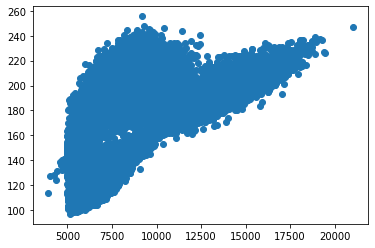

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
plt.scatter(X.iloc[:,0],X.iloc[:,2])

In [ ]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters = 5)

k.fit(X.iloc[:,[0,2]])

KMeans(n_clusters=5)

In [ ]:
k.labels_

array([2, 2, 3, ..., 2, 1, 4], dtype=int32)

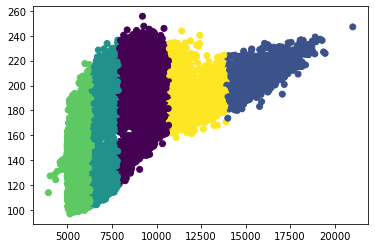

In [ ]:
plt.scatter(X.iloc[:,0],X.iloc[:,2],c=k.labels_)

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(X,k.labels_)

0.32576886652345827